In [1]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import matplotlib as mp
import jupyter
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [2]:
mem = Memory("./mycache")

@mem.cache
def get_data(mysvmlightfile):
    data = load_svmlight_file(mysvmlightfile)
    return data[0], data[1]

In [3]:
#读取数据集
x_train,y_train=get_data('a9a.txt')
x_test,y_test=get_data('a9a.t')

x_train=x_train.todense()

x_test=x_test.todense()
zero=np.zeros(x_test.shape[0])
x_test=np.column_stack((x_test,zero))

y_train=np.mat(y_train).T
y_test=np.mat(y_test).T
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-Desktop-机器学习实验课-ML2017-lab-01-master-ML2017-lab-02-master-__ipython-input__.get_data...
get_data('a9a.txt')
_________________________________________________________get_data - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-Desktop-机器学习实验课-ML2017-lab-01-master-ML2017-lab-02-master-__ipython-input__.get_data...
get_data('a9a.t')
_________________________________________________________get_data - 0.0s, 0.0min
(32561, 123) (16281, 123) (32561, 1) (16281, 1)


In [4]:
#参数全零初始化
w=np.zeros(x_train.shape[1])
w=np.mat(w)
w=w.T
b=0

In [5]:
#sgd
sgd_rate=0.005
sgd_w=w
sgd_b=b


#momentum
momentum_rate=0.0005
momentum_gamma_w=0.9
momentum_v_w = 0
momentum_gamma_b=0.9
momentum_v_b = 0
momentum_w=w
momentum_b=b


#NAG
nag_gamma_w=0.9
nag_rate=0.0005
nag_v_w = 0
nag_gamma_b=0.9
nag_v_b = 0
nag_w=w
nag_b=b

#adagrad
adagrad_rate=0.01
adagrad_G_b=0
adagrad_G_w=0
adagrad_epsilon=np.e**-6
adagrad_w=w
adagrad_b=b

#rmsprop
rmsprop_rate=0.005
rmsprop_G_b=0
rmsprop_G_w=0
rmsprop_epsilon=np.e**-6
rmsprop_gamma_w=0.9
rmsprop_gamma_b=0.9
rmsprop_w=w
rmsprop_b=b

#adadelta
adadelta_G_b=0
adadelta_G_w=0
adadelta_epsilon=np.e**-6
adadelta_gamma_w=0.95
adadelta_gamma_b=0.95
adadelta_t_w=0
adadelta_t_b=0
adadelta_w=w
adadelta_b=b

#adam
adam_rate=0.005
adam_G_b=0
adam_G_w=0
adam_epsilon=np.e**-6
adam_gamma_w=0.99
adam_gamma_b=0.99
adam_w=w
adam_b=b
adam_t_w=0
adam_t_b=0
adam_m_w=0
adam_m_b=0
adam_beta_w=0.9
adam_beta_b=0.9



In [6]:
#循环次数
time=0
c=1

In [7]:
#画图存数据的列表
time_list=[]
sgd_L_list=[]
momentum_L_list=[]
nag_L_list=[]
adagrad_L_list=[]
rmsprop_L_list=[]
adadelta_L_list=[]
adam_L_list=[]


选用svm线性模型yi=w.Txi+b,loss function=1/2 w.T w + cmax(0,1-yi(w.Txi+b))。 对w求梯度:当1-yi(w.Txi+b)>=0时，grad_w = w-c(yixi).T, 当1-yi(w.Txi+b)< 0时,grad_w=w. 对b求梯度，当1-yi(w.Txi+b)>=0时，grad_b = -cyi, 当1-yi(w.T*xi+b)< 0时,grad_b=0.

In [9]:
while time<100:
    #初始化
    time_list.append(time)
    print("iiterator times:", time)
    time = time + 1
    sgd_grad_b=0
    sgd_grad_w =np.mat( np.zeros((y_train[0] * x_train[0]).shape[1])).T
    sgd_L_test =0
    momentum_grad_b = 0
    momentum_grad_w = np.mat( np.zeros((y_train[0] * x_train[0]).shape[1])).T
    momentum_L_test = 0
    adagrad_grad_b = 0
    adagrad_grad_w =np.mat( np.zeros((y_train[0] * x_train[0]).shape[1])).T
    adagrad_L_test = 0
    rmsprop_grad_b = 0
    rmsprop_grad_w = np.mat( np.zeros((y_train[0] * x_train[0]).shape[1])).T
    rmsprop_L_test = 0
    nag_grad_b = 0
    nag_grad_w = np.mat( np.zeros((y_train[0] * x_train[0]).shape[1])).T
    nag_L_test = 0
    adadelta_grad_b = 0
    adadelta_grad_w = np.mat( np.zeros((y_train[0] * x_train[0]).shape[1])).T
    adadelta_L_test = 0
    adam_grad_b = 0
    adam_grad_w = np.mat( np.zeros((y_train[0] * x_train[0]).shape[1])).T
    adam_L_test = 0
    
    #随机取10个数据进行训练
    random_sample = random.sample(range(x_train.shape[0]), 10)
    
    #sgd
    for i in random_sample:
        if(1-(y_train[i]*(x_train[i]*sgd_w+sgd_b))>=0):
            sgd_grad_w+=-(y_train[i]*x_train[i]).T
            sgd_grad_b+=-y_train[i]
    sgd_grad_w=sgd_w+c*sgd_grad_w/10
    sgd_grad_b*=c/10
    sgd_w=sgd_w-sgd_rate*sgd_grad_w
    sgd_b=sgd_b-sgd_rate*sgd_grad_b
    for i in range(x_test.shape[0]):
        if(1-y_test[i]*(x_test[i]*sgd_w+sgd_b)>0):
            sgd_L_test=sgd_L_test+(1-y_test[i]*(x_test[i]*sgd_w+sgd_b))
    sgd_L_test=0.5*sgd_w.T*sgd_w+c*sgd_L_test/x_test.shape[0]
    #计算分类准确率
    correct=0
    for i in range(x_test.shape[0]):
        if(y_test[i]*(x_test[i]*sgd_w+sgd_b)>0):
            correct+=1
    print("sgd error:",sgd_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    sgd_L_list.append(np.array(sgd_L_test)[0][0])
    
    #momentum
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * momentum_w + momentum_b)) >= 0):
            momentum_grad_w += -(y_train[i] * x_train[i]).T
            momentum_grad_b += -y_train[i]
    momentum_grad_w = momentum_w + c * momentum_grad_w/10
    momentum_grad_b *= c/10
    momentum_v_w = momentum_gamma_w * momentum_v_w + momentum_rate * momentum_grad_w
    momentum_v_b = momentum_gamma_b * momentum_v_b + momentum_rate * momentum_grad_b
    momentum_w = momentum_w - momentum_v_w
    momentum_b = momentum_b - momentum_v_b
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * momentum_w + momentum_b) > 0):
            momentum_L_test = momentum_L_test + (1 - y_test[i] * (x_test[i] * momentum_w +momentum_b))
    momentum_L_test = 0.5 * momentum_w.T * momentum_w + c * momentum_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * momentum_w + momentum_b) > 0):
            correct += 1
    print("momentum error:", momentum_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    momentum_L_list.append(np.array(momentum_L_test)[0][0])
    
    #nag
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * (nag_w-nag_gamma_w*nag_v_w)  + (nag_b-nag_gamma_b*nag_v_b) )) >= 0):
            nag_grad_w += -(y_train[i] * x_train[i]).T
            nag_grad_b += -y_train[i]
    nag_grad_w = (nag_w-nag_gamma_w*nag_v_w) + c * nag_grad_w/10
    nag_grad_b *= c/10
    nag_v_w = nag_gamma_w * nag_v_w + nag_rate * nag_grad_w
    nag_v_b = nag_gamma_b * nag_v_b + nag_rate * nag_grad_b
    nag_w = nag_w - nag_v_w
    nag_b = nag_b - nag_v_b
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * nag_w + nag_b) > 0):
            nag_L_test = nag_L_test + (1 - y_test[i] * (x_test[i] * nag_w + nag_b))
    nag_L_test = 0.5 *nag_w.T *nag_w + c * nag_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * nag_w + nag_b) > 0):
            correct += 1
    print("nag error:", nag_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    nag_L_list.append(np.array(nag_L_test)[0][0])
    
    #adagrad
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * adagrad_w + adagrad_b)) >= 0):
            adagrad_grad_w += -(y_train[i] * x_train[i]).T
            adagrad_grad_b += -y_train[i]
    adagrad_grad_w =adagrad_w + c * adagrad_grad_w/10
    adagrad_grad_b *= c/10
    adagrad_G_w = adagrad_G_w + np.array(adagrad_grad_w) * np.array(adagrad_grad_w)
    adagrad_G_b = adagrad_G_b + np.array(adagrad_grad_b) * np.array(adagrad_grad_b)
    adagrad_w = adagrad_w - adagrad_rate * np.array(adagrad_grad_w) / np.sqrt(adagrad_G_w + adagrad_epsilon)
    adagrad_b = adagrad_b - adagrad_rate * np.array(adagrad_grad_b) / np.sqrt(adagrad_G_b + adagrad_epsilon)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * adagrad_w +adagrad_b) > 0):
            adagrad_L_test = adagrad_L_test + (1 - y_test[i] * (x_test[i] * adagrad_w + adagrad_b))
    adagrad_L_test = 0.5 * adagrad_w.T * adagrad_w + c * adagrad_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * adagrad_w +adagrad_b) > 0):
            correct += 1
    print("adagrad error:", adagrad_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    adagrad_L_list.append(np.array(adagrad_L_test)[0][0])
    
    #rmsprop
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * rmsprop_w + rmsprop_b)) >= 0):
            rmsprop_grad_w += -(y_train[i] * x_train[i]).T
            rmsprop_grad_b += -y_train[i]
    rmsprop_grad_w = rmsprop_w + c * rmsprop_grad_w/10
    rmsprop_grad_b *= c/10
    rmsprop_G_w = rmsprop_G_w * rmsprop_gamma_w + np.array(rmsprop_grad_w) * np.array(rmsprop_grad_w) * (1 - rmsprop_gamma_w)
    rmsprop_G_b = rmsprop_G_b * rmsprop_gamma_b + np.array(rmsprop_grad_b) * np.array(rmsprop_grad_b) * (1 - rmsprop_gamma_b)
    rmsprop_w = rmsprop_w - rmsprop_rate / np.sqrt(rmsprop_G_w + rmsprop_epsilon) * np.array(rmsprop_grad_w)
    rmsprop_b = rmsprop_b - rmsprop_rate / np.sqrt(rmsprop_G_b + rmsprop_epsilon) * np.array(rmsprop_grad_b)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * rmsprop_w + rmsprop_b) > 0):
            rmsprop_L_test = rmsprop_L_test + (1 - y_test[i] * (x_test[i] * rmsprop_w +rmsprop_b))
    rmsprop_L_test = 0.5 * rmsprop_w.T * rmsprop_w + c * rmsprop_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * rmsprop_w + rmsprop_b) > 0):
            correct += 1
    print("rmsprop error:", rmsprop_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    rmsprop_L_list.append(np.array(rmsprop_L_test)[0][0])

    #adadelta
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * adadelta_w + adadelta_b))>= 0):
            adadelta_grad_w += -(y_train[i] * x_train[i]).T
            adadelta_grad_b += -y_train[i]
    adadelta_grad_w = adadelta_w + c *adadelta_grad_w/10
    adadelta_grad_b *= c/10
    adadelta_G_w = adadelta_G_w * adadelta_gamma_w + np.array(adadelta_grad_w) * np.array(adadelta_grad_w) * (1 - adadelta_gamma_w)
    adadelta_G_b = adadelta_G_b * adadelta_gamma_b + np.array(adadelta_grad_b) * np.array(adadelta_grad_b) * (1 - adadelta_gamma_b)
    adadelta_delta_w = -np.sqrt(adadelta_t_w + adadelta_epsilon) / np.sqrt(adadelta_G_w + adadelta_epsilon) *0.1 * np.array(adadelta_grad_w)
    adadelta_delta_b = -np.sqrt(adadelta_t_b + adadelta_epsilon) / np.sqrt( adadelta_G_b + adadelta_epsilon)*0.1 * np.array(adadelta_grad_b)
    adadelta_w = adadelta_w + adadelta_delta_w
    adadelta_b = adadelta_b + adadelta_delta_b
    adadelta_t_w = adadelta_gamma_w * adadelta_t_w + (1 - adadelta_gamma_w) * np.array(adadelta_delta_w) * np.array(adadelta_delta_w)
    adadelta_t_b = adadelta_gamma_b * adadelta_t_b + (1 - adadelta_gamma_b) * np.array(adadelta_delta_b) * np.array(adadelta_delta_b)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * adadelta_w +adadelta_b) > 0):
            adadelta_L_test = adadelta_L_test + (1 - y_test[i] * (x_test[i] * adadelta_w + adadelta_b))
    adadelta_L_test = 0.5 * adadelta_w.T *adadelta_w + c * adadelta_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * adadelta_w + adadelta_b) > 0):
            correct += 1
    print("adadelta error:", adadelta_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    adadelta_L_list.append(np.array(adadelta_L_test)[0][0])

    #adam
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * adam_w + adam_b)) >= 0):
            adam_grad_w += -(y_train[i] * x_train[i]).T
            adam_grad_b += -y_train[i]
    adam_grad_w = adam_w + c * adam_grad_w/10
    adam_grad_b *= c/10
    adam_m_w = adam_beta_w * adam_m_w + (1 - adam_beta_w) * adam_grad_w
    adam_m_b = adam_beta_b * adam_m_b + (1 - adam_beta_b) * adam_grad_b
    adam_G_w = adam_G_w * adam_gamma_w + np.array(adam_grad_w) * np.array(adam_grad_w) * (1 - adam_gamma_w)
    adam_G_b = adam_G_b * adam_gamma_b + np.array(adam_grad_b) * np.array(adam_grad_b) * (1 - adam_gamma_b)
    adam_alpha_w = adam_rate * np.sqrt(1 - adam_gamma_w**time) / (1 -adam_beta_w** time)
    adam_alpha_b = adam_rate * np.sqrt(1 - adam_gamma_b** time) / (1 - adam_beta_b** time)
    adam_w = adam_w - adam_alpha_w * adam_m_w / np.sqrt(adam_G_w + adam_epsilon)
    adam_b = adam_b - adam_alpha_b * adam_m_b / np.sqrt(adam_G_b + adam_epsilon)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * adam_w + adam_b) > 0):
            adam_L_test = adam_L_test + (1 - y_test[i] * (x_test[i] * adam_w + adam_b))
    adam_L_test = 0.5 *adam_w.T * adam_w + c * adam_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * adam_w + adam_b) > 0):
            correct += 1
    print("adam error:", adam_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    adam_L_list.append(np.array(adam_L_test)[0][0])


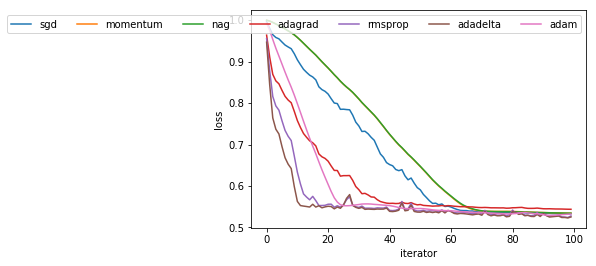

In [10]:
#画图
plt.xlabel('iterator')
plt.ylabel('loss')
line1=plt.plot(time_list,sgd_L_list)
line2=plt.plot(time_list,momentum_L_list)
line3=plt.plot(time_list,nag_L_list)
line4=plt.plot(time_list,adagrad_L_list)
line5=plt.plot(time_list,rmsprop_L_list)
line6=plt.plot(time_list,adadelta_L_list)
line7=plt.plot(time_list,adam_L_list)
label = ["sgd","momentum","nag","adagrad","rmsprop","adadelta","adam"]
plt.legend(label, loc = 0, ncol = 7)
plt.show()

In [15]:
#将b移入w，x增加一列全为1
'''读取数据集'''
x_train, y_train = datasets.load_svmlight_file('a9a.txt')
x_test, y_test = datasets.load_svmlight_file('a9a.t')
x_train = x_train.todense()
one=np.ones(x_train.shape[0])
x_train=np.column_stack((x_train,one))

x_test = x_test.todense()
zero = np.zeros(x_test.shape[0])
x_test = np.column_stack((x_test, zero))
one=np.ones(x_test.shape[0])
x_test=np.column_stack((x_test,one))

y_train = np.mat(y_train).T
y_test = np.mat(y_test).T
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(32561, 124) (16281, 124) (32561, 1) (16281, 1)


In [16]:
'''参数初始化'''
w = np.zeros(x_train.shape[1])
w = np.mat(w)
w = w.T

'''循环次数'''
time = 0
c = 1

In [17]:
'''sgd'''
sgd_rate = 0.005
sgd_w = w


'''momentum'''
momentum_rate = 0.0005
momentum_gamma_w = 0.9
momentum_v_w = 0
momentum_gamma_b = 0.9
momentum_w = w

'''NAG'''
nag_gamma_w = 0.9
nag_rate = 0.0005
nag_v_w = 0
nag_w = w

'''adagrad'''
adagrad_rate = 0.01
adagrad_G_w = 0
adagrad_epsilon = np.e ** -6
adagrad_w = w

'''rmsprop'''
rmsprop_rate = 0.005
rmsprop_G_w = 0
rmsprop_epsilon = np.e ** -6
rmsprop_gamma_w = 0.9
rmsprop_w = w

'''adadelta'''

adadelta_G_w = 0
adadelta_epsilon = np.e ** -6
adadelta_gamma_w = 0.95
adadelta_t_w = 0
adadelta_w = w

'''adam'''
adam_rate = 0.005
adam_G_w = 0
adam_epsilon = np.e ** -6
adam_gamma_w = 0.99
adam_w = w
adam_t_w = 0
adam_m_w = 0
adam_beta_w = 0.9

#画图
time_list = []
sgd_L_list = []
momentum_L_list = []
nag_L_list = []
adagrad_L_list = []
rmsprop_L_list = []
adadelta_L_list = []
adam_L_list = []

In [18]:
while time < 100:
    #初始化
    time_list.append(time)
    print("iterator times:", time)
    time = time + 1
    sgd_grad_w = np.mat(np.zeros((y_train[0] * x_train[0]).shape[1])).T
    sgd_L_test = 0
    momentum_grad_w = np.mat(np.zeros((y_train[0] * x_train[0]).shape[1])).T
    momentum_L_test = 0
    adagrad_grad_w = np.mat(np.zeros((y_train[0] * x_train[0]).shape[1])).T
    adagrad_L_test = 0
    rmsprop_grad_w = np.mat(np.zeros((y_train[0] * x_train[0]).shape[1])).T
    rmsprop_L_test = 0
    nag_grad_w = np.mat(np.zeros((y_train[0] * x_train[0]).shape[1])).T
    nag_L_test = 0
    adadelta_grad_w = np.mat(np.zeros((y_train[0] * x_train[0]).shape[1])).T
    adadelta_L_test = 0
    adam_grad_w = np.mat(np.zeros((y_train[0] * x_train[0]).shape[1])).T
    adam_L_test = 0
    
    #随机取10个数据训练
    random_sample = random.sample(range(x_train.shape[0]), 10)

    #sgd
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * sgd_w )) >= 0):
            sgd_grad_w += -(y_train[i] * x_train[i]).T
    sgd_grad_w = sgd_w + c * sgd_grad_w/10
    sgd_w = sgd_w - sgd_rate * sgd_grad_w
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * sgd_w) > 0):
            sgd_L_test = sgd_L_test + (1 - y_test[i] * (x_test[i] * sgd_w ))
    sgd_L_test = 0.5 * sgd_w.T * sgd_w + c * sgd_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * sgd_w ) > 0):
            correct += 1
    print("sgd error:", sgd_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    sgd_L_list.append(np.array(sgd_L_test)[0][0])

    #momentum
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * momentum_w )) >= 0):
            momentum_grad_w += -(y_train[i] * x_train[i]).T
    momentum_grad_w = momentum_w + c * momentum_grad_w/10
    momentum_v_w = momentum_gamma_w * momentum_v_w + momentum_rate * momentum_grad_w
    momentum_w = momentum_w - momentum_v_w
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * momentum_w ) > 0):
            momentum_L_test = momentum_L_test + (1 - y_test[i] * (x_test[i] * momentum_w))
    momentum_L_test = 0.5 * momentum_w.T * momentum_w + c * momentum_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * momentum_w ) > 0):
            correct += 1
    print("momentum error:", momentum_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    momentum_L_list.append(np.array(momentum_L_test)[0][0])

    #nag
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * (nag_w - nag_gamma_w * nag_v_w))) >= 0):
            nag_grad_w += -(y_train[i] * x_train[i]).T
    nag_grad_w = (nag_w - nag_gamma_w * nag_v_w) + c * nag_grad_w/10
    nag_v_w = nag_gamma_w * nag_v_w + nag_rate * nag_grad_w
    nag_w = nag_w - nag_v_w
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * nag_w ) > 0):
            nag_L_test = nag_L_test + (1 - y_test[i] * (x_test[i] * nag_w))
    nag_L_test = 0.5 * nag_w.T * nag_w + c * nag_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * nag_w ) > 0):
            correct += 1
    print("nag error:", nag_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    nag_L_list.append(np.array(nag_L_test)[0][0])

    #adagrad
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * adagrad_w )) >= 0):
            adagrad_grad_w += -(y_train[i] * x_train[i]).T
    adagrad_grad_w = adagrad_w + c * adagrad_grad_w/10
    adagrad_G_w = adagrad_G_w + np.array(adagrad_grad_w) * np.array(adagrad_grad_w)
    adagrad_w = adagrad_w - adagrad_rate * np.array(adagrad_grad_w) / np.sqrt(adagrad_G_w + adagrad_epsilon)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * adagrad_w ) > 0):
            adagrad_L_test = adagrad_L_test + (1 - y_test[i] * (x_test[i] * adagrad_w ))
    adagrad_L_test = 0.5 * adagrad_w.T * adagrad_w + c * adagrad_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * adagrad_w ) > 0):
            correct += 1
    print("adagrad error:", adagrad_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    adagrad_L_list.append(np.array(adagrad_L_test)[0][0])

    #rmsprop
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * rmsprop_w )) >= 0):
            rmsprop_grad_w += -(y_train[i] * x_train[i]).T
    rmsprop_grad_w = rmsprop_w + c * rmsprop_grad_w/10
    rmsprop_G_w = rmsprop_G_w * rmsprop_gamma_w + np.array(rmsprop_grad_w) * np.array(rmsprop_grad_w) * (
    1 - rmsprop_gamma_w)
    rmsprop_w = rmsprop_w - rmsprop_rate / np.sqrt(rmsprop_G_w + rmsprop_epsilon) * np.array(rmsprop_grad_w)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * rmsprop_w ) > 0):
            rmsprop_L_test = rmsprop_L_test + (1 - y_test[i] * (x_test[i] * rmsprop_w ))
    rmsprop_L_test = 0.5 * rmsprop_w.T * rmsprop_w + c * rmsprop_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * rmsprop_w ) > 0):
            correct += 1
    print("rmsprop error:", rmsprop_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    rmsprop_L_list.append(np.array(rmsprop_L_test)[0][0])

    #adadelta
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * adadelta_w )) >= 0):
            adadelta_grad_w += -(y_train[i] * x_train[i]).T
    adadelta_grad_w = adadelta_w + c * adadelta_grad_w/10
    adadelta_G_w = adadelta_G_w * adadelta_gamma_w + np.array(adadelta_grad_w) * np.array(adadelta_grad_w) * (1 - adadelta_gamma_w)
    adadelta_delta_w = -np.sqrt(adadelta_t_w + adadelta_epsilon) / np.sqrt(adadelta_G_w + adadelta_epsilon) * 0.1 * np.array(adadelta_grad_w)
    adadelta_w = adadelta_w + adadelta_delta_w
    adadelta_t_w = adadelta_gamma_w * adadelta_t_w + (1 - adadelta_gamma_w) * np.array(adadelta_delta_w) * np.array(adadelta_delta_w)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * adadelta_w ) > 0):
            adadelta_L_test = adadelta_L_test + (1 - y_test[i] * (x_test[i] * adadelta_w ))
    adadelta_L_test = 0.5 * adadelta_w.T * adadelta_w + c * adadelta_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * adadelta_w ) > 0):
            correct += 1
    print("adadelta error:", adadelta_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    adadelta_L_list.append(np.array(adadelta_L_test)[0][0])

    #adam
    for i in random_sample:
        if (1 - (y_train[i] * (x_train[i] * adam_w )) >= 0):
            adam_grad_w += -(y_train[i] * x_train[i]).T
    adam_grad_w = adam_w + c * adam_grad_w/10
    adam_m_w = adam_beta_w * adam_m_w + (1 - adam_beta_w) * adam_grad_w
    adam_G_w = adam_G_w * adam_gamma_w + np.array(adam_grad_w) * np.array(adam_grad_w) * (1 - adam_gamma_w)
    adam_alpha_w = adam_rate * np.sqrt(1 - adam_gamma_w ** time) / (1 - adam_beta_w ** time)
    adam_w = adam_w - adam_alpha_w * adam_m_w / np.sqrt(adam_G_w + adam_epsilon)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * adam_w ) > 0):
            adam_L_test = adam_L_test + (1 - y_test[i] * (x_test[i] * adam_w ))
    adam_L_test = 0.5 * adam_w.T * adam_w + c * adam_L_test / x_test.shape[0]
    #计算分类准确率
    correct = 0
    for i in range(x_test.shape[0]):
        if (y_test[i] * (x_test[i] * adam_w) > 0):
            correct += 1
    print("adam error:", adam_L_test)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    adam_L_list.append(np.array(adam_L_test)[0][0])

iterator times: 0
sgd error: [[ 0.99536601]]
correct rate: 0.7690559547939316
momentum error: [[ 0.99953485]]
correct rate: 0.7737239727289479
nag error: [[ 0.99953485]]
correct rate: 0.7737239727289479
adagrad error: [[ 0.97297559]]
correct rate: 0.7698544315459739
rmsprop error: [[ 0.9602858]]
correct rate: 0.7820158466924636
adadelta error: [[ 0.94927387]]
correct rate: 0.7839813279282599
adam error: [[ 0.9921486]]
correct rate: 0.7828757447331245
iterator times: 1
sgd error: [[ 0.98369656]]
correct rate: 0.7637737239727289
momentum error: [[ 0.99794236]]
correct rate: 0.7637737239727289
nag error: [[ 0.99794257]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.92059316]]
correct rate: 0.7640808304158221
rmsprop error: [[ 0.88663366]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.85468821]]
correct rate: 0.7637737239727289
adam error: [[ 0.9757564]]
correct rate: 0.7639579878385848
iterator times: 2
sgd error: [[ 0.97496074]]
correct rate: 0.7637737239727289
momentum er

sgd error: [[ 0.80414936]]
correct rate: 0.7637737239727289
momentum error: [[ 0.88251847]]
correct rate: 0.7637737239727289
nag error: [[ 0.88274624]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.64418522]]
correct rate: 0.7637737239727289
rmsprop error: [[ 0.56283213]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.56107472]]
correct rate: 0.7637737239727289
adam error: [[ 0.61780563]]
correct rate: 0.7637737239727289
iterator times: 19
sgd error: [[ 0.79418346]]
correct rate: 0.7637737239727289
momentum error: [[ 0.87299331]]
correct rate: 0.7637737239727289
nag error: [[ 0.87324752]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.63416304]]
correct rate: 0.7637737239727289
rmsprop error: [[ 0.56392219]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.55842322]]
correct rate: 0.7637737239727289
adam error: [[ 0.59783037]]
correct rate: 0.7637737239727289
iterator times: 20
sgd error: [[ 0.78379448]]
correct rate: 0.7637737239727289
momentum error: [[ 0.863

sgd error: [[ 0.65753618]]
correct rate: 0.7637737239727289
momentum error: [[ 0.71568069]]
correct rate: 0.7637737239727289
nag error: [[ 0.71646448]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.56204901]]
correct rate: 0.7637737239727289
rmsprop error: [[ 0.55374064]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.55347172]]
correct rate: 0.7637737239727289
adam error: [[ 0.57985423]]
correct rate: 0.7637737239727289
iterator times: 37
sgd error: [[ 0.65530406]]
correct rate: 0.7637737239727289
momentum error: [[ 0.70843942]]
correct rate: 0.7637737239727289
nag error: [[ 0.70925367]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.56174377]]
correct rate: 0.7637737239727289
rmsprop error: [[ 0.55634779]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.55505601]]
correct rate: 0.7637737239727289
adam error: [[ 0.57387673]]
correct rate: 0.7637737239727289
iterator times: 38
sgd error: [[ 0.64658497]]
correct rate: 0.7637737239727289
momentum error: [[ 0.701

sgd error: [[ 0.56038227]]
correct rate: 0.7637737239727289
momentum error: [[ 0.58027058]]
correct rate: 0.7637737239727289
nag error: [[ 0.58141595]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.55943128]]
correct rate: 0.7637737239727289
rmsprop error: [[ 0.55665368]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.55801219]]
correct rate: 0.7637737239727289
adam error: [[ 0.56203142]]
correct rate: 0.7637737239727289
iterator times: 55
sgd error: [[ 0.55660772]]
correct rate: 0.7637737239727289
momentum error: [[ 0.57460722]]
correct rate: 0.7637737239727289
nag error: [[ 0.57569967]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.55810251]]
correct rate: 0.7637737239727289
rmsprop error: [[ 0.55376906]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.55484338]]
correct rate: 0.7637737239727289
adam error: [[ 0.56093752]]
correct rate: 0.7637737239727289
iterator times: 56
sgd error: [[ 0.55415267]]
correct rate: 0.7637737239727289
momentum error: [[ 0.569

sgd error: [[ 0.55210399]]
correct rate: 0.7637737239727289
momentum error: [[ 0.55657603]]
correct rate: 0.7637737239727289
nag error: [[ 0.55515689]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.55547535]]
correct rate: 0.7637737239727289
rmsprop error: [[ 0.55738048]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.56075706]]
correct rate: 0.7637737239727289
adam error: [[ 0.55680307]]
correct rate: 0.7637737239727289
iterator times: 73
sgd error: [[ 0.55183782]]
correct rate: 0.7637737239727289
momentum error: [[ 0.55679002]]
correct rate: 0.7637737239727289
nag error: [[ 0.5553576]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.55558113]]
correct rate: 0.7637737239727289
rmsprop error: [[ 0.55339431]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.55293216]]
correct rate: 0.7637737239727289
adam error: [[ 0.55554748]]
correct rate: 0.7637737239727289
iterator times: 74
sgd error: [[ 0.5519772]]
correct rate: 0.7637737239727289
momentum error: [[ 0.55710

sgd error: [[ 0.55085893]]
correct rate: 0.7637737239727289
momentum error: [[ 0.55406795]]
correct rate: 0.7637737239727289
nag error: [[ 0.55376762]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.55433218]]
correct rate: 0.7637737239727289
rmsprop error: [[ 0.55486766]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.55499411]]
correct rate: 0.7637737239727289
adam error: [[ 0.55157932]]
correct rate: 0.7637737239727289
iterator times: 91
sgd error: [[ 0.5511147]]
correct rate: 0.7637737239727289
momentum error: [[ 0.55337792]]
correct rate: 0.7637737239727289
nag error: [[ 0.55316572]]
correct rate: 0.7637737239727289
adagrad error: [[ 0.55412499]]
correct rate: 0.7637737239727289
rmsprop error: [[ 0.56216495]]
correct rate: 0.7637737239727289
adadelta error: [[ 0.56247061]]
correct rate: 0.7637737239727289
adam error: [[ 0.55240561]]
correct rate: 0.7637737239727289
iterator times: 92
sgd error: [[ 0.55099112]]
correct rate: 0.7637737239727289
momentum error: [[ 0.5527

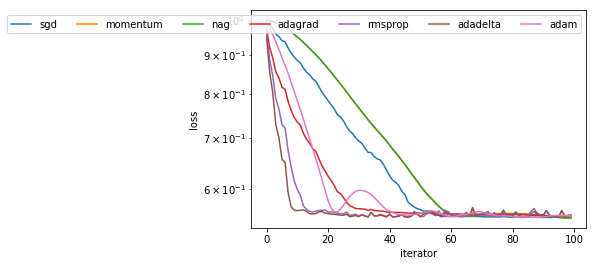

In [20]:
#画图
plt.xlabel('iterator')
plt.ylabel('loss')
plt.yscale('log')
line1=plt.plot(time_list,sgd_L_list)
line2=plt.plot(time_list,momentum_L_list)
line3=plt.plot(time_list,nag_L_list)
line4=plt.plot(time_list,adagrad_L_list)
line5=plt.plot(time_list,rmsprop_L_list)
line6=plt.plot(time_list,adadelta_L_list)
line7=plt.plot(time_list,adam_L_list)
label = ["sgd","momentum","nag","adagrad","rmsprop","adadelta","adam"]
plt.legend(label, loc =0, ncol = 7)
plt.show()